In [1]:
!pip install opencv-python opencv-python-headless matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()  # Unggah file melalui dialog di Colab


Saving Schloss Neuschwanstein.jpg to Schloss Neuschwanstein.jpg


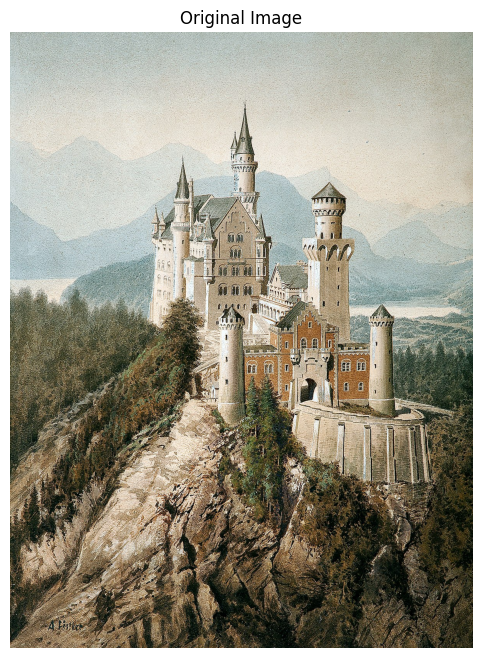

In [4]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale atau RGB
image = cv2.imread("Schloss Neuschwanstein.jpg")  # Ganti "example.jpg" dengan nama file Anda
if image is None:
    print("File tidak ditemukan atau format tidak didukung.")
else:
    # Mengubah dari BGR (OpenCV) ke RGB untuk matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar dengan matplotlib
    plt.figure(figsize=(8, 8))
    plt.title("Original Image")
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()


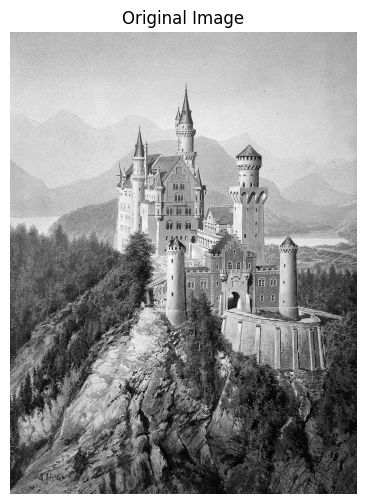

In [6]:
import numpy as np

# Fungsi untuk menampilkan gambar
def show_image(title, image, cmap="gray"):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
    plt.show()

# Membaca gambar
image = cv2.imread("Schloss Neuschwanstein.jpg", cv2.IMREAD_GRAYSCALE)  # Ganti dengan path gambar Anda
show_image("Original Image", image)

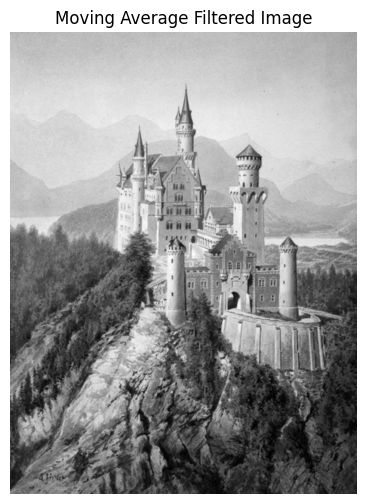

In [7]:
# 1. Moving Average Filter
def moving_average_filter(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    return cv2.filter2D(image, -1, kernel)

moving_avg_img = moving_average_filter(image, kernel_size=5)
show_image("Moving Average Filtered Image", moving_avg_img)

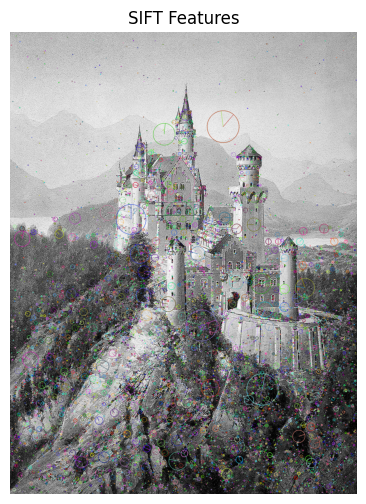

In [8]:
# 2. Deteksi Fitur dengan SIFT
def detect_features_sift(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return sift_image, keypoints, descriptors

sift_img, keypoints, descriptors = detect_features_sift(image)
show_image("SIFT Features", sift_img)

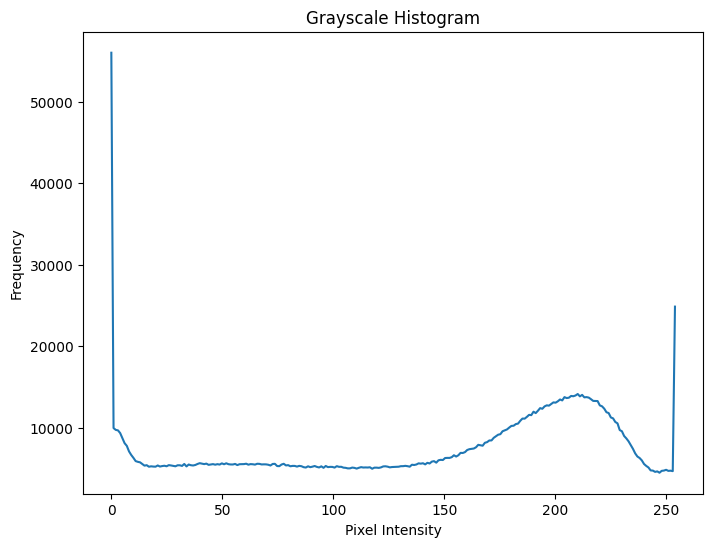

In [9]:
# 3. Representasi Histogram Gambar
def plot_histogram(image):
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))
    plt.figure(figsize=(8, 6))
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.plot(bin_edges[0:-1], histogram)
    plt.show()

plot_histogram(image)

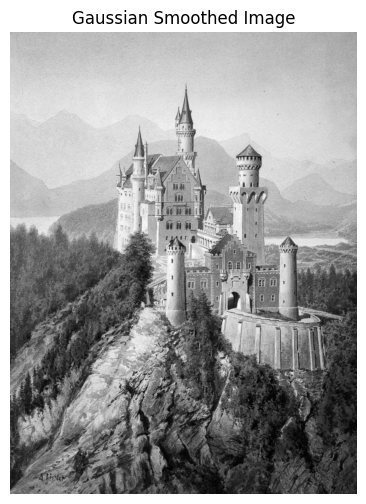

In [10]:
# 4. Gaussian Smoothing
def gaussian_smoothing(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

gaussian_img = gaussian_smoothing(image, kernel_size=5)
show_image("Gaussian Smoothed Image", gaussian_img)

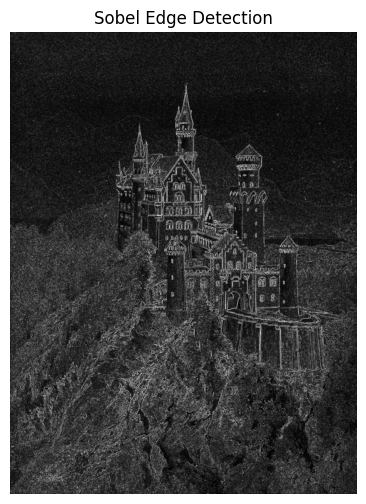

In [11]:
# 5. Deteksi Tepi dengan Sobel Filter
def sobel_edge_detection(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    return sobel_combined

sobel_img = sobel_edge_detection(image)
show_image("Sobel Edge Detection", sobel_img)

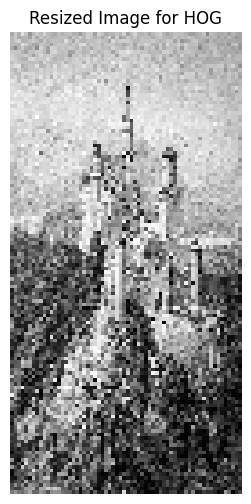

HOG Features Shape: (3780,)


In [12]:
# 6. Histogram of Oriented Gradients (HOG)
def compute_hog(image):
    win_size = (64, 128)
    block_size = (16, 16)
    block_stride = (8, 8)
    cell_size = (8, 8)
    nbins = 9
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    image_resized = cv2.resize(image, win_size)  # HOG membutuhkan ukuran tetap
    hog_features = hog.compute(image_resized)
    return hog_features, image_resized

hog_features, hog_image = compute_hog(image)
show_image("Resized Image for HOG", hog_image)
print(f"HOG Features Shape: {hog_features.shape}")